# <b><p style="background-color: #ff6200; font-family:calibri; color:white; font-size:100%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Task 20->Feature Engineering</p>

### Feature Engineering
Feature engineering is the process of using domain knowledge to select, modify, or create new features (variables) that make machine learning algorithms work better. It is one of the most critical steps in building effective machine-learning models because it directly influences the model's ability to learn and make accurate predictions.

#### Key steps in feature engineering include:
1. Feature Selection: Identifying the most relevant features that contribute to the model's accuracy.
2. Feature Transformation: Applying mathematical transformations to features to improve the model's performance.
3. Feature Creation: Creating new features from existing data to provide more information to the model.


<h2 align="left">Tasks :</font></h2>    

1. [Feature Selection](#1)
    - Load the dataset.
    - Analyze the correlation between features and the target variable.
    - Use methods like mutual information or chi-squared test to select important features.
    - Document the selected features and explain why they were chosen.
2. [Feature Transformation](#2)
    - Load the dataset.
    - Apply transformations such as log transformation, normalization, or standardization.
3. [Feature Creation](#3)
    - Load the dataset.
    - Create new features by combining or modifying existing ones (e.g., creating an interaction term, extracting date features, etc.).
4. [Polynomial Features](#4)
    - Load the dataset.
    - Use the `PolynomialFeatures` class from `sklearn.preprocessing` to generate polynomial features.

5. [Handling Categorical Features](#5)
    - Load the dataset.
   - Apply encoding techniques like one-hot encoding, label encoding, or target encoding.
   

In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif, SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<a id=1></a>
# <b><span style='color:#fcc36d'>1|</span><span style='color:#ff6200'> Feature Selection</span>

### Feature Selection
Feature selection is a crucial step in the machine learning workflow, involving the selection of a subset of relevant features (variables, predictors) for use in model construction. This process helps improve model performance, reduce overfitting, and decrease computational costs.

#### Key Benefits of Feature Selection
- Improves Model Performance: By removing irrelevant or redundant features, feature selection can enhance the accuracy of predictive models.
- Reduces Overfitting: Simplifying the model by selecting only relevant features helps to reduce the risk of overfitting.
- Decreases Computational Cost: Reducing the number of features leads to less computational effort and faster training times.
- Enhances Model Interpretability: Simplified models with fewer features are easier to interpret and understand.

### <b><span style='color:#fcc36d'>Data Preparation</span>

In [4]:
titanic.drop('deck', axis=1, inplace=True)   #### Almost 77%  are null
titanic.drop('alive', axis=1, inplace=True)   ##### Redundant information as in survived column
titanic.dropna(subset=['age', 'embark_town'], inplace=True)

In [5]:
titanic_copy = titanic.copy()
titanic_copy['sex'] = titanic_copy['sex'].map({'male': 0, 'female': 1})
titanic_copy['embarked'] = titanic_copy['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic_copy['who'] = titanic_copy['who'].map({'man': 0, 'woman': 1, 'child': 2})
titanic_copy['class'] = titanic_copy['class'].map({'First': 1, 'Second': 2, 'Third': 3}).astype(int)
titanic_copy['embark_town'] = titanic_copy['embark_town'].map({'Cherbourg': 0, 'Queenstown': 1, 'Southampton': 2})
titanic_copy['adult_male'] = titanic_copy['adult_male'].astype(int)
titanic_copy['alone'] = titanic_copy['alone'].astype(int)

### <b><span style='color:#fcc36d'>Analyze the correlation between features and the target variable.</span>

In [6]:
corr_matrix = titanic_copy.corr()
corr_matrix['survived'].sort_values(ascending=False)

survived       1.000000
sex            0.536762
who            0.455489
fare           0.266100
parch          0.095265
sibsp         -0.015523
age           -0.082446
embarked      -0.181979
embark_town   -0.181979
alone         -0.199741
pclass        -0.356462
class         -0.356462
adult_male    -0.551151
Name: survived, dtype: float64

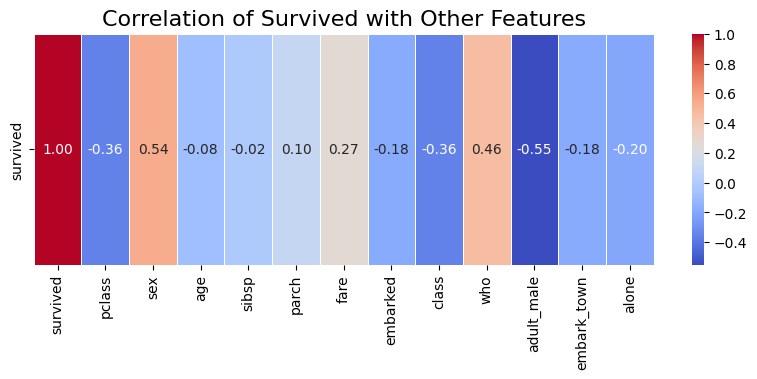

In [7]:
corr_matrix = titanic_copy.corr()
corr_survived = corr_matrix[['survived']].T
plt.figure(figsize=(10, 3))
heatmap = sns.heatmap(corr_survived, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
heatmap.set_title('Correlation of Survived with Other Features', size=16)
plt.show()

###  <b><span style='color:#fcc36d'>Use methods like mutual information or chi-squared test to select important features.</span>

In [8]:
X = titanic_copy.drop(['survived'], axis=1)
y = titanic_copy['survived']

# Mutual Information
mutual_info = mutual_info_classif(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns)
mutual_info_series.sort_values(ascending=False)

who            0.166027
adult_male     0.142493
sex            0.139605
fare           0.117646
class          0.075393
pclass         0.045319
embark_town    0.035621
age            0.029422
embarked       0.028047
alone          0.009145
sibsp          0.000000
parch          0.000000
dtype: float64

In [9]:
# Chi-Squared Test
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X, y)
chi2_scores = chi2_selector.scores_
chi2_series = pd.Series(chi2_scores, index=X.columns)
chi2_series.sort_values(ascending=False)

fare           4081.679420
who             132.657053
sex             130.515207
adult_male       90.826443
age              34.246098
pclass           28.243213
class            28.243213
alone            12.367930
parch            10.883500
embarked          8.956375
embark_town       8.956375
sibsp             0.288691
dtype: float64

### <b><span style='color:#fcc36d'>Document the selected features and explain why they were chosen.</span> 

### Feature Selection Based on Correlation, Mutual Information, and Chi-Squared Test
After analyzing the correlation, mutual information, and chi-squared test results, we can identify the most relevant features for predicting survival in the Titanic dataset.
1. Correlation Analysis :
The correlation analysis helps us understand the linear relationship between each feature and the target variable (Survived). Higher absolute values indicate stronger relationship.
2. Mutual Information:
Mutual information measures the dependency between the feature and the target variable. Higher values indicate greater dependency.
3. Chi-Squared Test:
The chi-squared test evaluates the independence between categorical features and the target variable. Higher values indicate greater independence.

#### Selected Features
Based on the above results, we select the following features as the most important for predicting survival on the Titanic:

- **Sex**: High correlation (0.536762), significant mutual information (0.154274), and high chi-squared score (130.515207). The sex of a passenger strongly influenced the likelihood of survival, with females having a higher survival rate.
- **Who**: Significant correlation (0.455489), highest mutual information (0.173966), and high chi-squared score (132.657053). This feature distinguishes between men, women, and children, providing additional context beyond just Sex.
- **Adult_male**: High negative correlation (-0.551151), high mutual information (0.169699), and high chi-squared score (90.826443). This feature identifies adult males, who had a lower survival rate compared to women and children.
- **Fare**: Moderate positive correlation (0.266100), significant mutual information (0.129237), and extremely high chi-squared score (4081.679420). Passengers who paid higher fares often had better accommodations and a higher likelihood of survival.
- **Class**: Moderate negative correlation (-0.356462), notable mutual information (0.089409), and significant chi-squared score (28.243213). This feature indicates the class of travel, with first-class passengers having a higher survival rate compared to lower classes.

<a id=2></a>
# <b><span style='color:#fcc36d'>2|</span><span style='color:#ff6200'> Feature Transformation</span>

### Feature Transformation
Feature transformation involves modifying or transforming existing features to improve the performance of machine learning models. This process can help in handling different scales of features, dealing with skewed distributions, and creating new features that may better capture the underlying patterns in the data.

#### Key Benefits of Feature Transformation
- Improves Model Performance: Transforming features can make them more suitable for the learning algorithm, enhancing model accuracy.
- Handles Skewed Distributions: Transformation can make skewed distributions more symmetrical, improving the model's ability to generalize.
- Enables the Use of Linear Models: Some transformations can make the relationship between features and the target variable more linear.
- Combines Features: Transformation can create new features that better represent the underlying patterns in the data.

### <b><span style='color:#fcc36d'>Log Transformation</span>

In [25]:
X['Fare_log'] = X['fare'].apply(lambda x: np.log(x + 1))
X['Fare_log'].head()

0    2.110213
1    4.280593
2    2.188856
3    3.990834
4    2.202765
Name: Fare_log, dtype: float64

### <b><span style='color:#fcc36d'>Min_Max Scaler</span>

In [26]:
min_max_scaler = MinMaxScaler()
X_min_max_scaled = pd.DataFrame(min_max_scaler.fit_transform(X), columns=X.columns)
X_min_max_scaled.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone,Fare_log
0,1.0,0.0,0.271174,0.2,0.0,0.014151,1.0,1.0,0.0,1.0,1.0,0.0,0.338125
1,0.0,1.0,0.472229,0.2,0.0,0.139136,0.0,0.0,0.5,0.0,0.0,0.0,0.685892
2,1.0,1.0,0.321438,0.0,0.0,0.015469,1.0,1.0,0.5,0.0,1.0,1.0,0.350727
3,0.0,1.0,0.434531,0.2,0.0,0.103644,1.0,0.0,0.5,0.0,1.0,0.0,0.639463
4,1.0,0.0,0.434531,0.0,0.0,0.015713,1.0,1.0,0.0,1.0,1.0,1.0,0.352955


### <b><span style='color:#fcc36d'>Standard Scaler</span>

In [27]:
standard_scaler = StandardScaler()
X_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(X), columns=X.columns)
X_standard_scaled.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone,Fare_log
0,0.908600,-0.756138,-0.527669,0.522511,-0.506787,-0.516380,0.519588,0.908600,-0.772937,0.850865,0.519588,-1.138760,-0.976410
1,-1.482983,1.322511,0.577094,0.522511,-0.506787,0.694046,-2.049487,-1.482983,0.667721,-1.175275,-2.049487,-1.138760,1.307189
2,0.908600,1.322511,-0.251478,-0.552714,-0.506787,-0.503620,0.519588,0.908600,0.667721,-1.175275,0.519588,0.878148,-0.893664
3,-1.482983,1.322511,0.369951,0.522511,-0.506787,0.350326,0.519588,-1.482983,0.667721,-1.175275,0.519588,-1.138760,1.002314
4,0.908600,-0.756138,0.369951,-0.552714,-0.506787,-0.501257,0.519588,0.908600,-0.772937,0.850865,0.519588,0.878148,-0.879030


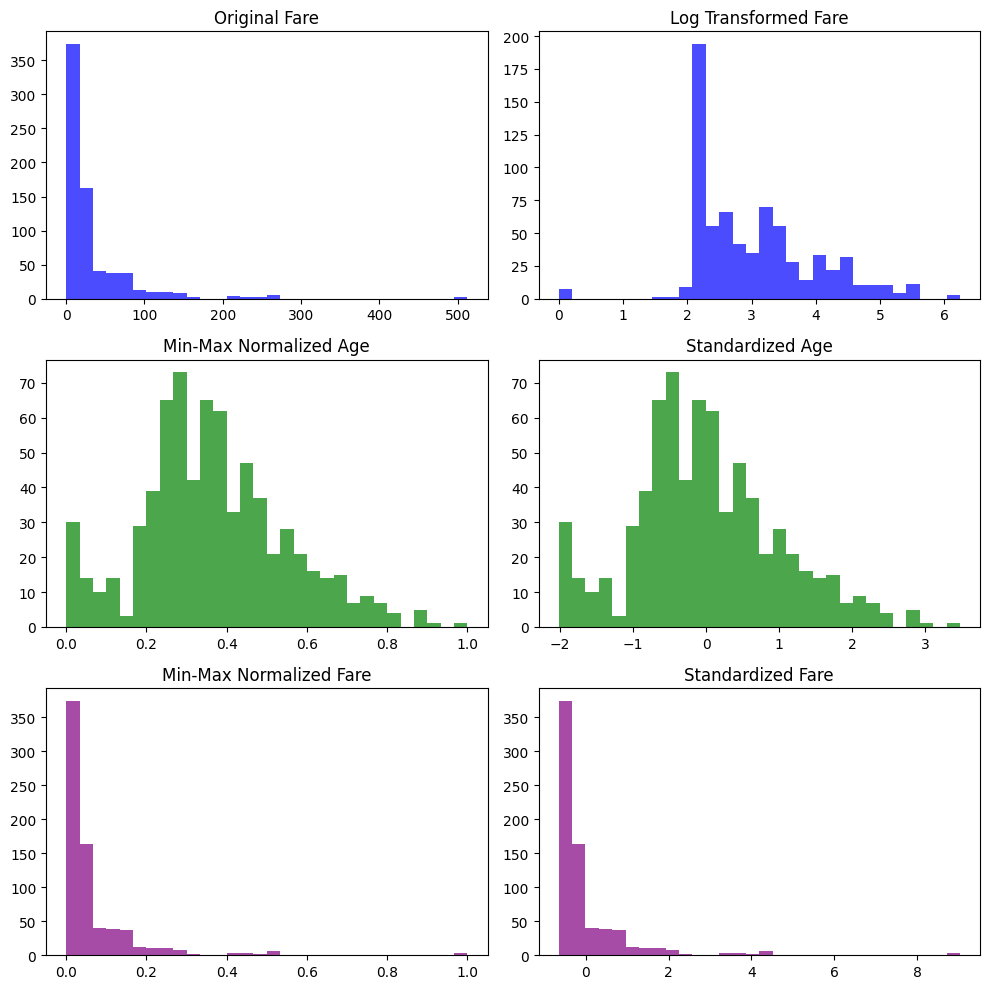

In [43]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

axes[0, 0].hist(X['fare'], bins=30, color='blue', alpha=0.7)
axes[0, 0].set_title('Original Fare')

axes[0, 1].hist(X['Fare_log'], bins=30, color='blue', alpha=0.7)
axes[0, 1].set_title('Log Transformed Fare')

axes[1, 0].hist(X_min_max_scaled['age'], bins=30, color='green', alpha=0.7)
axes[1, 0].set_title('Min-Max Normalized Age')

axes[1, 1].hist(X_standard_scaled['age'], bins=30, color='green', alpha=0.7)
axes[1, 1].set_title('Standardized Age')

axes[2, 0].hist(X_min_max_scaled['fare'], bins=30, color='purple', alpha=0.7)
axes[2, 0].set_title('Min-Max Normalized Fare')

axes[2, 1].hist(X_standard_scaled['fare'], bins=30, color='purple', alpha=0.7)
axes[2, 1].set_title('Standardized Fare')

plt.tight_layout()
plt.show()

<a id=3></a>
# <b><span style='color:#fcc36d'>3|</span><span style='color:#ff6200'> Feature Creation</span>

### Feature Creation
Feature creation, also known as feature engineering, involves generating new features from the existing data. This process is vital for enhancing the predictive power of machine learning models by providing them with more relevant information.

#### Importance of Feature Creation
- Enhances Predictive Power: Well-engineered features can significantly improve model accuracy.
- Simplifies Complex Relationships: Creating new features can simplify complex relationships between variables, making them easier to model.
- Improves Model Performance: Better features often lead to better performance, reducing the need for complex models.
- Facilitates Model Interpretability: Newly created features can help provide insights into the underlying data patterns, making models more interpretable.

In [52]:
# Family Size
titanic_copy['Family_size'] = titanic_copy['sibsp'] + titanic_copy['parch'] + 1

In [47]:
titanic_copy.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone,Family_size
0,0,3,0,22.0,1,0,7.2500,2,3,0,1,2,0,2
1,1,1,1,38.0,1,0,71.2833,0,1,1,0,0,0,2
2,1,3,1,26.0,0,0,7.9250,2,3,1,0,2,1,1
3,1,1,1,35.0,1,0,53.1000,2,1,1,0,2,0,2
4,0,3,0,35.0,0,0,8.0500,2,3,0,1,2,1,1


In [53]:
# Family Survival Rate
family_survival_rate = titanic_copy.groupby('Family_size')['survived'].transform('mean')
titanic_copy['Family_survival_rate'] = family_survival_rate
titanic_copy.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone,Family_size,Family_survival_rate
0,0,3,0,22.0,1,0,7.2500,2,3,0,1,2,0,2,0.546763
1,1,1,1,38.0,1,0,71.2833,0,1,1,0,0,0,2,0.546763
2,1,3,1,26.0,0,0,7.9250,2,3,1,0,2,1,1,0.318408
3,1,1,1,35.0,1,0,53.1000,2,1,1,0,2,0,2,0.546763
4,0,3,0,35.0,0,0,8.0500,2,3,0,1,2,1,1,0.318408


<a id=4></a>
# <b><span style='color:#fcc36d'>4|</span><span style='color:#ff6200'> Polynomial Features</span>

### Polynomial Features
Polynomial features involve generating new features by taking polynomial combinations of the existing features. This technique is used to capture non-linear relationships between the features and the target variable, which can help improve the performance of machine learning models.

#### Why Use Polynomial Features?
- Capture Non-Linear Relationships: Polynomial features allow models to learn and represent non-linear relationships between variables.
- Enhance Model Complexity: By adding polynomial features, you can increase the complexity of your model, enabling it to capture more intricate patterns in the data.
- Improve Predictive Power: In many cases, introducing polynomial features can lead to better predictive performance compared to linear models.

In [59]:
housing = pd.read_csv('housing.csv')
housing.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [62]:
X = housing.drop('MEDV', axis=1)

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_poly = poly.fit_transform(X)
poly_feature_names = poly.get_feature_names_out(X.columns)
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)
X_poly_df.head()

,RM,LSTAT,PTRATIO,RM LSTAT,RM PTRATIO,LSTAT PTRATIO
0,6.575,4.98,15.3,32.74350,100.5975,76.194
1,6.421,9.14,17.8,58.68794,114.2938,162.692
2,7.185,4.03,17.8,28.95555,127.8930,71.734
3,6.998,2.94,18.7,20.57412,130.8626,54.978
4,7.147,5.33,18.7,38.09351,133.6489,99.671


<a id=5></a>
# <b><span style='color:#fcc36d'>5|</span><span style='color:#ff6200'> Handling Categorical Features</span>

### Categorical Features
Categorical features are variables that contain discrete values representing categories or groups. Handling these features properly is crucial in preparing data for machine learning models, as many algorithms cannot directly process categorical data. Here are several techniques for effectively handling categorical features.

#### Why Handle Categorical Features?
- Machine Learning Compatibility: Most machine learning algorithms require numerical input, so categorical features need to be converted into numerical representations.
- Prevent Misinterpretation: Treating categorical variables as numerical can lead to misinterpretation of their importance and relationships in the model.
- Capture Relationships: Proper encoding of categorical variables can capture meaningful relationships between categories, enhancing model performance.

### <b><span style='color:#fcc36d'> Label Encoding</span>

In [75]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
titanic['Sex_encoded'] = label_encoder.fit_transform(titanic['sex'])

### <b><span style='color:#fcc36d'> One-hot Encoding</span>

In [76]:
embarked_dummies = pd.get_dummies(titanic['embarked'], prefix='embarked')
titanic = pd.concat([titanic, embarked_dummies], axis=1)

In [78]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,embarked_C,embarked_Q,embarked_S,embarked_C,embarked_Q,embarked_S,Pclass_encoded,embarked_C,embarked_Q,embarked_S
0,0.0,3.0,male,22.0,1.0,0.0,7.2500,S,Third,man,...,False,False,True,False,False,True,0.239437,False,False,True
1,1.0,1.0,female,38.0,1.0,0.0,71.2833,C,First,woman,...,True,False,False,True,False,False,0.652174,True,False,False
2,1.0,3.0,female,26.0,0.0,0.0,7.9250,S,Third,woman,...,False,False,True,False,False,True,0.239437,False,False,True
3,1.0,1.0,female,35.0,1.0,0.0,53.1000,S,First,woman,...,False,False,True,False,False,True,0.652174,False,False,True
4,0.0,3.0,male,35.0,0.0,0.0,8.0500,S,Third,man,...,False,False,True,False,False,True,0.239437,False,False,True
